Changing display options (important!)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

## Imports and data

In [4]:
path = 'data/mnist/'

In [5]:
import os
os.makedirs(path, exist_ok=True)

In [6]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [7]:
get_data(URL+FILENAME, path+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(path+FILENAME)

In [8]:
# for px in range(0, len(x[0])):
#     i = px % 28
#     for i in range(0, 28):
#         print(x[i], end=" ")
#     print()
#np.reshape(x[0],(-1,28,28)); x[0]

In [9]:
x[0].shape

(784,)

In [10]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

### Normalize

In [11]:
mean = x.mean()
std = x.std()

In [12]:
x = (x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [13]:
x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

#### Useful Methods

In [14]:
def show(img, title=None):
    plt.imshow(img, cmap='gray')
    if title is not None: plt.title(title)

In [15]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

#### Plots

In [16]:
x_valid.shape

(10000, 784)

In [17]:
x_imgs = np.reshape(x_valid, (-1, 28, 28)); x_imgs.shape

(10000, 28, 28)

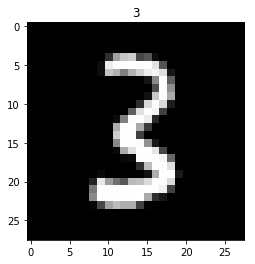

In [18]:
show(x_imgs[0], y_valid[0])

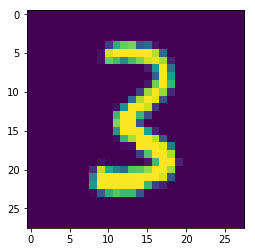

In [19]:
plt.imshow(x_imgs[0])

In [20]:
y_valid.shape

(10000,)

Looking at the part of an image:

In [21]:
x_imgs[0,10:15,10:15]

array([[-0.42452, -0.42452, -0.42452, -0.42452,  0.17294],
       [-0.42452, -0.42452, -0.42452,  0.78312,  2.43567],
       [-0.42452, -0.27197,  1.20261,  2.77889,  2.80432],
       [-0.42452,  1.76194,  2.80432,  2.80432,  1.73651],
       [-0.42452,  2.20685,  2.80432,  2.80432,  0.40176]], dtype=float32)

In [22]:
x_imgs[0:2,10:15,10:15]

array([[[-0.42452, -0.42452, -0.42452, -0.42452,  0.17294],
        [-0.42452, -0.42452, -0.42452,  0.78312,  2.43567],
        [-0.42452, -0.27197,  1.20261,  2.77889,  2.80432],
        [-0.42452,  1.76194,  2.80432,  2.80432,  1.73651],
        [-0.42452,  2.20685,  2.80432,  2.80432,  0.40176]],

       [[ 2.52465, -0.04316, -0.42452, -0.42452, -0.42452],
        [ 2.7916 ,  2.29584, -0.05587, -0.42452, -0.42452],
        [ 1.7238 ,  2.7916 ,  2.33397, -0.10672, -0.42452],
        [-0.25926,  2.00346,  2.80432,  2.34669,  1.26617],
        [-0.42452, -0.24655,  1.38058,  2.80432,  2.7916 ]]], dtype=float32)

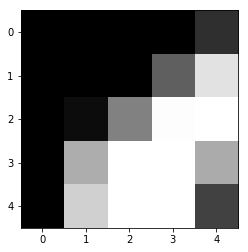

In [23]:
show(x_imgs[0,10:15,10:15])

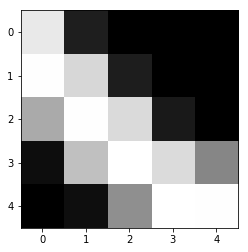

In [24]:
show(x_imgs[1,10:15,10:15])

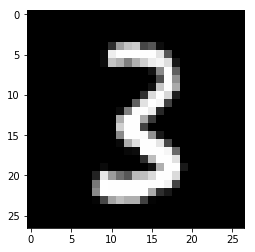

In [25]:
show(x_imgs[0,0:-1,0:-1])

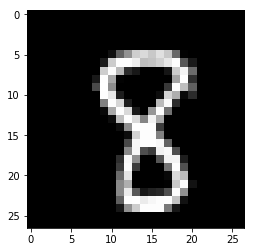

In [26]:
show(x_imgs[1,0:-1,0:-1])

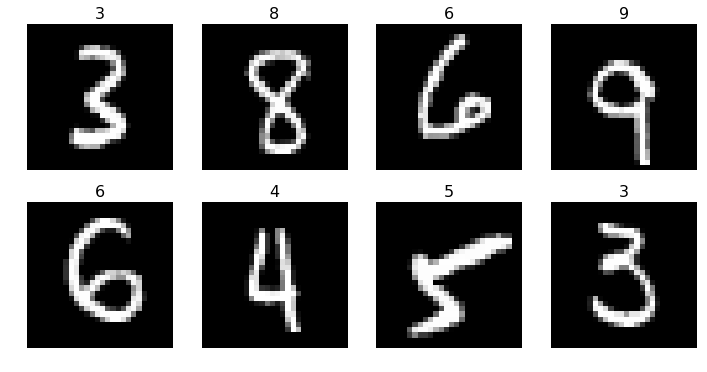

In [27]:
plots(x_imgs[:8], titles=y_valid[:8])

## Neural Net for Logistic Regression in PyTorch

In [28]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

In [29]:
net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

Each input is a vector of size 28*28 pixels and our output is of size 10

In [30]:
md = ImageClassifierData.from_arrays(path, (x, y), (x_valid, y_valid))

In [31]:
md

In [32]:
loss = nn.NLLLoss()
metrics = [accuracy]
# opt = optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt = optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [33]:
t = [o.numel() for o in net.parameters()]
t, sum(t)

([78400, 100, 10000, 100, 1000, 10], 89610)

### Defining loss function and metrics

In [34]:
def binary_loss(y, p):
    return np.mean(-y*np.log(p) - (1-y)*np.log(1-p))

In [35]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

### Fitting the model

In [36]:
fit(net, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.311254   0.194425   0.942     



[0.19442546997070312, 0.942]

In [37]:
preds = predict(net, md.val_dl)

In [38]:
# printing first-10 predictions
# for pred in range(10):
#     print(preds[pred])
print(preds[:10])

[[-11.89824 -13.61743  -7.70636  -0.00164 -15.40549  -7.72558 -16.12076 -13.69314  -8.35461  -7.58984]
 [-10.44901 -12.22325  -9.84373  -9.96012 -11.15383 -11.90941 -11.12985 -11.62697  -0.0002  -10.67907]
 [ -7.49708  -9.9977   -7.18483  -9.79334  -7.35204  -9.2339   -0.00243  -9.45709  -9.54107  -8.96712]
 [-11.93015 -13.682   -13.1803   -8.52907  -7.02988  -8.19622 -13.15132  -9.86759  -8.75971  -0.00158]
 [ -7.82374 -10.40695  -7.48569 -10.65899  -9.64408  -9.76215  -0.00129 -10.75381  -9.08953 -10.87588]
 [ -5.5192   -6.14243  -5.3928   -7.5633   -0.30777  -5.78048  -5.25142  -5.68285  -5.68842  -1.4331 ]
 [ -6.02803  -9.35212 -10.25012  -8.14564  -8.19539  -0.0147   -8.27599  -7.51272  -4.66609  -6.65918]
 [ -9.05747  -4.71025  -7.7156   -0.14936 -12.44809  -2.05011 -11.81127 -10.26818  -8.9163   -8.20571]
 [ -7.00053  -7.31504  -6.57726  -6.83965  -7.56162  -7.72642  -7.76814  -7.63825  -0.00709  -6.75736]
 [ -5.89707  -5.5903   -4.99606  -7.44048  -0.11338  -5.82364  -5.1731   

In [39]:
# using magical tool argmax: 
# Return indices of the maximum values along the given axis. 
preds.argmax(axis=1)[:10]

array([3, 8, 6, 9, 6, 4, 5, 3, 8, 4], dtype=int64)

In [40]:
preds.shape

(10000, 10)

In [41]:
preds = preds.argmax(1)

In [42]:
np.mean(preds == y_valid)

0.942

This is equal to the accuracy obtained in __fit()__ method.

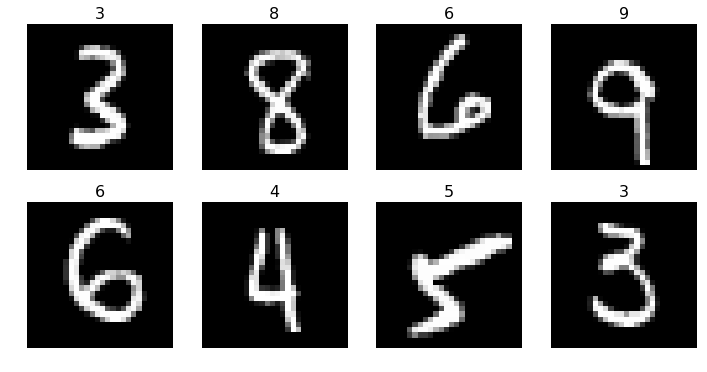

In [43]:
# Predictions
plots(x_imgs[:8], titles=preds[:8])

Now, we tune the parameters...

In [44]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.233996   0.203904   0.9429    
    1      0.209809   0.174036   0.9512                                                                                
    2      0.211658   0.242501   0.9341                                                                                
    3      0.188105   0.215297   0.9423                                                                                
    4      0.200719   0.179968   0.9527                                                                                



[0.17996824865341188, 0.9527]

In [45]:
set_lrs(opt, 1e-2)

In [46]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.075614   0.086028   0.9744    
    1      0.051005   0.07855    0.9764                                                                                
    2      0.049006   0.073974   0.978                                                                                 



[0.07397429025173187, 0.978]

In [47]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.045604   0.071361   0.9782    
    1      0.033861   0.073479   0.9769                                                                                
    2      0.036258   0.069104   0.9776                                                                                
    3      0.031557   0.06825    0.979                                                                                 
    4      0.026895   0.066269   0.9793                                                                                



[0.0662694678068161, 0.9793]

In [48]:
set_lrs(opt, 1e-2)

In [49]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.02575    0.0664     0.9795    
    1      0.027506   0.068143   0.9783                                                                                
    2      0.025355   0.064052   0.9796                                                                                



[0.0640519179701805, 0.9796]